In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
from catboost import CatBoostClassifier

pd.set_option('display.max_columns', 500)

In [2]:
features_data = pd.concat([pd.read_csv(f"../data/features_week_{i}.csv") for i in range(1,10)])

In [3]:
features_data

,gameId,playId,nflId,frameId,x,y,playDirection,will_tackle,s,a,dis,o,dir,a_blocker_1,a_blocker_2,a_blocker_3,dir_blocker_1,dir_blocker_2,dir_blocker_3,direction_to_ball_carrier,direction_to_blocker_1,direction_to_blocker_2,direction_to_blocker_3,dis_blocker_1,dis_blocker_2,dis_blocker_3,distance_to_ball_carrier,distance_to_blocker_1,distance_to_blocker_2,distance_to_blocker_3,o_blocker_1,o_blocker_2,o_blocker_3,s_blocker_1,s_blocker_2,s_blocker_3,s_ball_carrier,a_ball_carrier,dis_ball_carrier,o_ball_carrier,dir_ball_carrier,ball_carrier_distance_to_sideline,ball_carrier_distance_to_endzone
0,2022090800,56,38577.0,2,78.20,27.69,left,0.0,1.78,4.43,0.16,182.79,193.69,4.09,13.82,6.53,323.64,NaN,315.97,167.143687,207.740184,145.267307,349.114473,0.61,2.16,0.47,10.246878,4.361250,8.688046,9.796270,33.35,NaN,38.13,6.10,20.90,4.63,6.24,1.27,0.62,45.78,348.92,15.62,70.48
1,2022090800,56,41239.0,2,91.36,31.32,left,0.0,3.93,2.21,0.40,1.80,43.72,2.53,1.22,2.75,58.40,252.66,57.65,239.691202,235.007980,334.502449,154.018092,0.27,0.02,0.21,12.602539,1.098590,1.440278,1.757640,63.45,247.70,159.02,2.68,0.11,2.07,6.24,1.27,0.62,45.78,348.92,15.62,70.48
2,2022090800,56,42816.0,2,71.93,7.73,left,0.0,4.12,1.68,0.41,201.67,281.08,0.81,6.53,0.66,280.26,315.97,302.31,164.067238,66.168099,156.854932,135.477601,0.80,0.47,0.21,31.146509,1.781937,11.245088,22.903984,264.32,38.13,204.20,7.97,4.63,2.13,6.24,1.27,0.62,45.78,348.92,15.62,70.48
3,2022090800,56,43294.0,2,78.02,40.21,left,1.0,5.76,2.29,0.56,39.86,6.40,13.82,4.09,2.53,NaN,323.64,58.40,44.196304,43.637388,347.941395,56.416351,2.16,0.61,0.27,3.528810,7.433794,8.855399,14.932555,NaN,33.35,63.45,20.90,6.10,2.68,6.24,1.27,0.62,45.78,348.92,15.62,70.48
4,2022090800,56,43298.0,2,92.10,33.65,left,0.0,1.57,4.35,0.17,24.06,31.76,2.75,2.53,1.22,57.65,58.40,252.66,250.872644,2.290610,316.029155,339.461254,0.21,0.27,0.02,12.298996,0.750600,2.362118,3.876403,159.02,63.45,247.70,2.07,2.68,0.11,6.24,1.27,0.62,45.78,348.92,15.62,70.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416136,2022110700,3787,52627.0,40,33.31,24.13,right,0.0,4.86,2.39,0.50,241.92,217.30,2.13,1.30,2.58,136.94,81.24,NaN,238.045637,338.198591,236.258315,237.885790,0.34,0.24,0.15,8.332647,5.762126,6.157175,8.370819,98.89,96.66,NaN,3.33,2.37,1.37,1.60,4.04,0.18,103.01,121.39,19.72,83.76
416137,2022110700,3787,53460.0,40,22.08,24.32,right,0.0,0.54,0.98,0.06,60.14,80.83,0.40,0.94,1.16,249.49,115.27,129.56,137.875454,288.060472,156.978384,125.217593,0.07,0.16,0.19,6.202064,1.935355,3.400853,3.745557,157.17,108.00,150.93,0.71,1.60,1.80,1.60,4.04,0.18,103.01,121.39,19.72,83.76
416138,2022110700,3787,53533.0,40,33.19,38.17,right,0.0,5.59,0.41,0.56,190.20,188.24,1.89,2.13,1.16,145.15,136.94,129.56,200.641079,260.377006,193.086074,206.693741,0.54,0.34,0.19,19.715603,2.931245,8.921687,17.919894,110.47,98.89,150.93,5.38,3.33,1.80,1.60,4.04,0.18,103.01,121.39,19.72,83.76
416139,2022110700,3787,54541.0,40,24.78,19.81,right,0.0,1.74,2.74,0.18,134.33,153.81,2.58,1.08,0.94,NaN,129.29,115.27,93.527468,95.158542,356.260497,315.208347,0.15,0.20,0.16,1.462771,1.445855,1.533264,1.944557,NaN,185.90,108.00,1.37,1.92,1.60,1.60,4.04,0.18,103.01,121.39,19.72,83.76


In [4]:
y = features_data["will_tackle"].astype(int)

In [5]:
X = features_data.drop(columns=["gameId", "playId", "nflId", "frameId", "x", "y", "playDirection", "will_tackle"])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
model = CatBoostClassifier(scale_pos_weight = 2, verbose=0)
model.fit(X_train, y_train)

In [15]:
y_pred = model.predict(X_test)

In [16]:
y_test.sum()/len(y_test)

0.09635392817752153

In [17]:
y_pred.sum()/len(y_pred)

0.08823716787379503

In [18]:
balanced_accuracy_score(y_train, model.predict(X_train))

0.7819962704206833

In [19]:
balanced_accuracy_score(y_test, y_pred)

0.7671926892197692

In [20]:
confusion_matrix(y_test, y_pred)

array([[1311650,   50038],
       [  62269,   82925]], dtype=int64)

In [21]:
result_df = features_data[["gameId", "playId", "nflId", "frameId"]].copy()

In [22]:
result_df["tackling_probability"] = model.predict_proba(X)[:,1]

<Axes: ylabel='Frequency'>

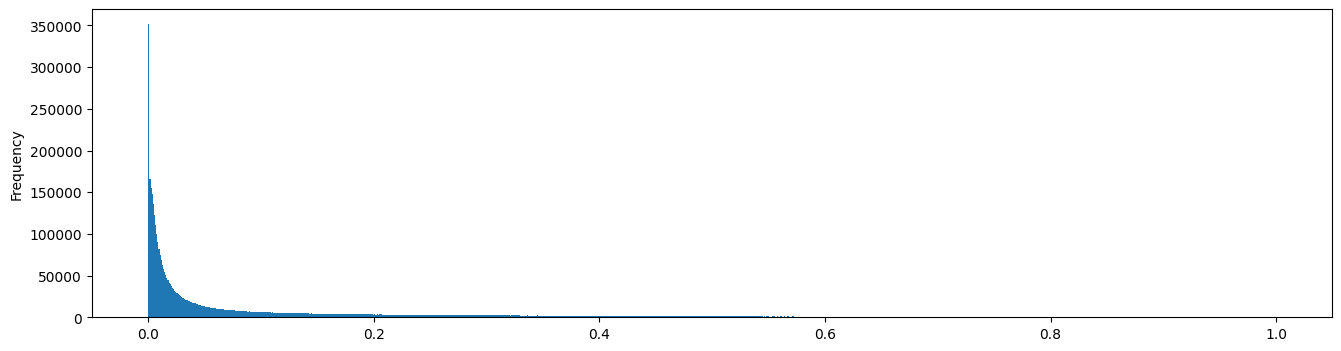

In [23]:
result_df["tackling_probability"].plot.hist(bins=1000, figsize=(16,4))

In [60]:
result_df

,gameId,playId,nflId,frameId,tackling_probability
0,2022090800,56,38577.0,2,0.129060
1,2022090800,56,41239.0,2,0.012520
2,2022090800,56,42816.0,2,0.003133
3,2022090800,56,43294.0,2,0.919423
4,2022090800,56,43298.0,2,0.013911
...,...,...,...,...,...
527929,2022091200,3826,47941.0,49,0.233863
527930,2022091200,3826,52435.0,49,0.778472
527931,2022091200,3826,52456.0,49,0.643381
527932,2022091200,3826,54505.0,49,0.283646


In [24]:
tracking = pd.concat([pd.read_csv(f"../data/tracking_week_{i}.csv") for i in range(1,10)])

In [25]:
tackling_probability = tracking[["gameId", "playId", "nflId", "frameId"]].merge(result_df, how="left", on=["gameId", "playId", "nflId", "frameId"])

In [26]:
tackling_probability["tackling_probability"] = tackling_probability["tackling_probability"].fillna(0)

In [27]:
tackling_probability.to_csv("../data/tackling_probability.csv", index=False)

In [28]:
model.save_model("../models/model_probability")

In [29]:
import pickle

In [30]:
pickle.dump(model, open("../models/model_probability.pkl", 'wb'))